In [1]:
import os
import sys
print(os.getcwd())
os.chdir('..')
print(os.getcwd())
sys.path.append(os.getcwd())
print(sys.path)

import logging
import uuid

import pandas as pd
import numpy as np
from sqlalchemy import select, func, distinct, or_, text

sys.path.append(os.getcwd())

from scheme import METHOD, TECHNOLOGY, FOCUS

logging.basicConfig(format='%(asctime)s [%(levelname)s] %(name)s: %(message)s', level=logging.INFO)
logger = logging.getLogger('import')
logger.setLevel(logging.DEBUG)

pd.options.display.max_columns = None

/home/rept/workspace/cdr_ecosystem/Exploration
/home/rept/workspace/cdr_ecosystem
['/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/home/rept/.venvs/main12/lib/python3.12/site-packages', '/home/rept/workspace/cdr_ecosystem']


In [2]:
for t in TECHNOLOGY.values():
    print(t)

{'key': 'tech|0', 'name': 'CCS', 'value': 0, 'colour': (5.54, 74.8, 48.24)}
{'key': 'tech|1', 'name': 'BECCS', 'value': 1, 'colour': (27.53, 97.33, 70.59)}
{'key': 'tech|2', 'name': 'DAC(CS)', 'value': 2, 'colour': (19.91, 89.3, 47.65)}
{'key': 'tech|3', 'name': 'CCUS', 'value': 3, 'colour': (19.14, 96.45, 66.86)}
{'key': 'tech|4', 'name': 'Soil Carbon Sequestration', 'value': 4, 'colour': (144.22, 100.0, 21.37)}
{'key': 'tech|5', 'name': 'Afforestation/Reforestation', 'value': 5, 'colour': (138.42, 53.77, 41.57)}
{'key': 'tech|6', 'name': 'Restoration of landscapes/peats', 'value': 6, 'colour': (121.5, 40.4, 61.18)}
{'key': 'tech|7', 'name': 'Agroforestry', 'value': 7, 'colour': (111.43, 47.57, 79.8)}
{'key': 'tech|8', 'name': 'Forest Management', 'value': 8, 'colour': (104.51, 51.72, 94.31)}
{'key': 'tech|9', 'name': 'Biochar', 'value': 9, 'colour': (336.08, 89.94, 68.82)}
{'key': 'tech|10', 'name': 'Enhanced weathering (land based)', 'value': 10, 'colour': (302.26, 32.92, 68.43)}
{'

In [3]:
df = pd.read_feather('data/cdr_map.arrow').replace({np.nan: None})
key = 'tech|1'
df['target'] = (df[key] >= 0.5).astype(int)
df['label'] = (df[key] >= 0.5).astype(int)
df['text'] = [f"{r['title']} {r['abstract']}" for _, r in df.iterrows()]
df.head()

idx         x         y  publication_year openalex_id  \
0    0 -0.868164 -0.446777              2013  W966429964   
1    1 -0.208374 -0.237793              2011  W965290479   
2    2 -0.975098 -0.104126              2016  W957495025   
3    3 -0.284424 -0.297119              2015  W950113603   
4    4 -0.523926 -0.448975              2012   W94835692   

                                               title  \
0  Role and activities of the IEA Implementing Ag...   
1  Manned Mission Planning Considerations when Us...   
2  Technology assessment of plasma arc reforming ...   
3  Effect of headspace carbon dioxide sequestrati...   
4  A Comparative Economical Analysis of Technolog...   

                                            abstract  \
0  This presentation informs on the FBC Implement...   
1  As the commercial spacecraft industry increase...   
2  Coal to liquids processes contribute significa...   
3  This study investigated the impact of CO2 remo...   
4  Abstract   In the scenario of the Brazilian Pr...   

                                                 doi  \
0                                               None   
1                                               None   
2      https://doi.org/10.1016/j.jclepro.2015.07.104   
3     https://doi.org/10.1016/j.ijhydene.2015.06.077   
4  https://doi.org/10.1016/b978-0-444-59507-2.501...   

                                             authors  \
0                                       Bo G Leckner   
1                                Edward DeSimpelaere   
2  Liberty Sheunesu Mapamba; F.H.D. Conradie; J.I...   
3  Noha Nasr; Preethi Velayutham; Elsayed Elbeshb...   
4  Tatiana Salviano Gadêlha; Aline R. S. Guimarãe...   

                                        institutions    tech|0    tech|1  \
0                                               None  0.981445  0.016174   
1  NASA Johnson Space Center Houston, TX, United ...  0.923828  0.005539   
2  CRCED Vaal, North West University, P Bag x6001...  0.977051  0.023163   
3  Department of Civil and Environmental Engineer...  0.867188   0.01432   
4  Departament of Chemical Engineering, Escola de...       1.0       0.0   

     tech|2    tech|3    tech|4    tech|5    tech|6    tech|7    tech|8  \
0  0.008789    0.0186  0.005455  0.003786  0.003305  0.002365  0.003334   
1  0.059418  0.056519  0.004379  0.004517  0.003096  0.002413  0.002783   
2  0.007385  0.014679  0.005043  0.002974  0.002668  0.001736  0.002699   
3  0.018478   0.19751  0.006443   0.00433  0.003887  0.002653   0.00338   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

     tech|9   tech|10   tech|11   tech|12   tech|13   tech|14   tech|15  \
0  0.003513  0.006363  0.005566  0.004986  0.003685  0.002771  0.012634   
1  0.002541   0.00563   0.00771  0.005707  0.004341  0.002882  0.020523   
2   0.00433  0.004997  0.003798  0.003664  0.003506   0.00198  0.008072   
3  0.009079  0.005333  0.005581  0.002909  0.015205  0.002678  0.009041   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

    tech|16    meth|0    meth|1    meth|2    meth|3    meth|4    meth|5  \
0  0.002268  0.022354  0.034515  0.012947  0.021759  0.011002   0.79248   
1  0.002581  0.018799  0.019226  0.011826  0.024231  0.007748  0.776855   
2   0.00172  0.022598  0.050323  0.972656  0.023026  0.007294  0.051544   
3  0.002478  0.012573  0.984863  0.006203  0.016556  0.003592  0.022186   
4       0.0       0.0       0.0       0.0       1.0       0.0       0.0   

     meth|6    meth|7    meth|8    meth|9    cont|0    cont|1    cont|2  \
0  0.026184  0.037048  0.280273  0.063477  0.015884   0.03186  0.630859   
1  0.023483  0.027466  0.273682  0.059448  0.003393  0.001007   0.00366   
2  0.004601  0.005596  0.007107  0.010315  0.002665  0.000907  0.002499   
3  0.003075  0.002308  0.002825   0.00597  0.002953   0.00131  0.002949   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

     cont|3    cont|4    cont|5  

In [4]:
print(df.shape)
n_all = df.shape[0]
n_excl = (df['label']==0).sum()
n_incl = (df['label']==1).sum()
print(df['label'].value_counts())
print()
df_sample = pd.concat([df[df['label']==0].sample(n=int(((2 * n_incl) / n_all) * n_excl)), df[df['label']==1]])
print(df_sample.shape)
print(df_sample['label'].value_counts())

(50350, 46)
label
0    48553
1     1797
Name: count, dtype: int64

(5262, 46)
label
0    3465
1    1797
Name: count, dtype: int64


In [5]:
print('predicted BECCS', (df['tech|1']>=0.5).sum())
print('labelled BECCS', (df['tech|1']>0.99).sum())
print('predicted SCS', (df['tech|4']>=0.5).sum())
print('labelled SCS', (df['tech|4']>0.99).sum())

predicted BECCS 1797
labelled BECCS 273
predicted SCS 7644
labelled SCS 298


## Dataset prep

In [6]:
import numpy as np

import torch
import evaluate
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, AutoModelForMaskedLM

model_name = 'climatebert/distilroberta-base-climate-f'
tokenizer = AutoTokenizer.from_pretrained(model_name, max_length=512)
#model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

dataset = Dataset.from_pandas(df_sample)
tokenizer = AutoTokenizer.from_pretrained(model_name, model_max_length=512)
encoded_dataset = dataset.map(lambda rows: tokenizer(rows['text'], padding='max_length', truncation=True), batched=True)

n_total = len(dataset)
n_eval = int(0.2 * n_total)
n_train = n_total - n_eval

shuffeled_dataset = encoded_dataset.shuffle()

# Split the dataset into train and test
train_dataset = shuffeled_dataset.select(range(n_train))
eval_dataset = shuffeled_dataset.select(range(n_train, n_total))

print('train', n_train)
print('eval', n_eval)
print(sum(train_dataset['label']), len(train_dataset))
print(sum(eval_dataset['label']), len(eval_dataset))

2024-07-03 20:01:26,433 [INFO] datasets: PyTorch version 2.3.1 available.
2024-07-03 20:01:26,434 [INFO] datasets: TensorFlow version 2.16.1 available.
2024-07-03 20:01:26.742358: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-03 20:01:27.328774: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Map:   0%|          | 0/5262 [00:00<?, ? examples/s]

train 4210
eval 1052
1431 4210
366 1052


## Training

In [7]:
tokenizer = AutoTokenizer.from_pretrained(model_name, max_length=512)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Define training arguments
training_args = TrainingArguments(
    output_dir='data/results',
    num_train_epochs=2,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=200,
    weight_decay=0.01,
    logging_dir='data/logs',
    logging_steps=10,
    eval_strategy='steps',
    eval_steps=100,
)

metrics1 = evaluate.combine(["recall", "precision"])
metrics2 = evaluate.combine(["accuracy", "f1"])

a=None
def compute_metrics(p):
    a=p
    logits, labels = p
    print(p)
    predictions = np.argmax(logits, axis=-1)
    m1 = metrics1.compute(predictions=predictions, references=labels, zero_division=0, average='binary')
    m2 = metrics2.compute(predictions=predictions, references=labels)
    return {**m1, **m2}

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print(results)

metrics = evaluate.combine(["recall", "precision", "accuracy", "f1"])

task_evaluator = evaluate.evaluator("text-classification")
eval_results = task_evaluator.compute(
    model_or_pipeline=model,
    data=train_dataset,
    metric=metrics,
)
print(eval_results)
eval_results = task_evaluator.compute(
    model_or_pipeline=model,
    data=eval_dataset,
    metric=metrics,
)
print(eval_results)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at climatebert/distilroberta-base-climate-f and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[codecarbon INFO @ 20:01:36] [setup] RAM Tracking...
[codecarbon INFO @ 20:01:36] [setup] GPU Tracking...
[codecarbon INFO @ 20:01:36] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 20:01:36] [setup] CPU Tracking...
[codecarbon WARNING @ 20:01:36] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 20:01:37] We saw that you have a AMD Ryzen 7 5700X 8-Core Processor but we don't know it. Please contact us.
[codecarbon INFO @ 20:01:37] CPU Model on constant consumption mode: AMD Ryzen 7 5700X 8-Core Processor
[codecarbon INFO @ 20:01:37] >>> Tracker's metadata:
[codecarb

[codecarbon INFO @ 20:01:55] Energy consumed for RAM : 0.000098 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 20:01:55] Energy consumed for all GPUs : 0.000609 kWh. Total GPU Power : 146.07968801671745 W
[codecarbon INFO @ 20:01:55] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:01:55] 0.000884 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:02:10] Energy consumed for RAM : 0.000196 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 20:02:10] Energy consumed for all GPUs : 0.001227 kWh. Total GPU Power : 148.32581601485484 W
[codecarbon INFO @ 20:02:10] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:02:10] 0.001777 kWh of electricity used since the beginning.


[codecarbon INFO @ 20:02:25] Energy consumed for RAM : 0.000294 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 20:02:25] Energy consumed for all GPUs : 0.001844 kWh. Total GPU Power : 148.0736155791649 W
[codecarbon INFO @ 20:02:25] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:02:25] 0.002670 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:02:40] Energy consumed for RAM : 0.000392 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 20:02:40] Energy consumed for all GPUs : 0.002462 kWh. Total GPU Power : 148.32004635584707 W
[codecarbon INFO @ 20:02:40] Energy consumed for all CPUs : 0.000709 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:02:40] 0.003563 kWh of electricity used since the beginning.


[codecarbon INFO @ 20:02:55] Energy consumed for RAM : 0.000490 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 20:02:55] Energy consumed for all GPUs : 0.003084 kWh. Total GPU Power : 149.35023035906195 W
[codecarbon INFO @ 20:02:55] Energy consumed for all CPUs : 0.000886 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:02:55] 0.004460 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:03:10] Energy consumed for RAM : 0.000588 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 20:03:10] Energy consumed for all GPUs : 0.003703 kWh. Total GPU Power : 148.31704726871635 W
[codecarbon INFO @ 20:03:10] Energy consumed for all CPUs : 0.001063 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:03:10] 0.005354 kWh of electricity used since the beginning.


[codecarbon INFO @ 20:03:25] Energy consumed for RAM : 0.000686 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 20:03:25] Energy consumed for all GPUs : 0.004329 kWh. Total GPU Power : 149.73647507235015 W
[codecarbon INFO @ 20:03:25] Energy consumed for all CPUs : 0.001241 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:03:25] 0.006256 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:03:40] Energy consumed for RAM : 0.000784 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 20:03:40] Energy consumed for all GPUs : 0.004943 kWh. Total GPU Power : 147.3216439673539 W
[codecarbon INFO @ 20:03:40] Energy consumed for all CPUs : 0.001418 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:03:40] 0.007145 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:03:55] Energy consumed for RAM : 0.000882 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 20:03:55] Energy consumed for all GPUs : 0.005575 kWh. Total GPU Power : 151.785842797

[codecarbon INFO @ 20:04:10] Energy consumed for RAM : 0.000980 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 20:04:10] Energy consumed for all GPUs : 0.006192 kWh. Total GPU Power : 148.0926370980546 W
[codecarbon INFO @ 20:04:10] Energy consumed for all CPUs : 0.001772 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:04:10] 0.008944 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:04:25] Energy consumed for RAM : 0.001078 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 20:04:25] Energy consumed for all GPUs : 0.006805 kWh. Total GPU Power : 147.07409983751322 W
[codecarbon INFO @ 20:04:25] Energy consumed for all CPUs : 0.001949 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:04:25] 0.009832 kWh of electricity used since the beginning.


[codecarbon INFO @ 20:04:41] Energy consumed for RAM : 0.001177 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 20:04:41] Energy consumed for all GPUs : 0.007392 kWh. Total GPU Power : 140.112079406792 W
[codecarbon INFO @ 20:04:41] Energy consumed for all CPUs : 0.002127 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:04:41] 0.010695 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:04:56] Energy consumed for RAM : 0.001274 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 20:04:56] Energy consumed for all GPUs : 0.008002 kWh. Total GPU Power : 146.56162421794676 W
[codecarbon INFO @ 20:04:56] Energy consumed for all CPUs : 0.002304 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:04:56] 0.011581 kWh of electricity used since the beginning.


[codecarbon INFO @ 20:05:11] Energy consumed for RAM : 0.001373 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 20:05:11] Energy consumed for all GPUs : 0.008631 kWh. Total GPU Power : 150.64707843596184 W
[codecarbon INFO @ 20:05:11] Energy consumed for all CPUs : 0.002481 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:05:11] 0.012484 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:05:26] Energy consumed for RAM : 0.001470 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 20:05:26] Energy consumed for all GPUs : 0.009243 kWh. Total GPU Power : 146.96145787549986 W
[codecarbon INFO @ 20:05:26] Energy consumed for all CPUs : 0.002658 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:05:26] 0.013372 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:05:41] Energy consumed for RAM : 0.001568 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 20:05:41] Energy consumed for all GPUs : 0.009868 kWh. Total GPU Power : 150.08729576

[codecarbon INFO @ 20:05:56] Energy consumed for RAM : 0.001667 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 20:05:56] Energy consumed for all GPUs : 0.010501 kWh. Total GPU Power : 151.54622280095097 W
[codecarbon INFO @ 20:05:56] Energy consumed for all CPUs : 0.003013 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:05:56] 0.015181 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:06:11] Energy consumed for RAM : 0.001765 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 20:06:11] Energy consumed for all GPUs : 0.011118 kWh. Total GPU Power : 148.00560429971082 W
[codecarbon INFO @ 20:06:11] Energy consumed for all CPUs : 0.003190 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:06:11] 0.016073 kWh of electricity used since the beginning.


[codecarbon INFO @ 20:06:26] Energy consumed for RAM : 0.001863 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 20:06:26] Energy consumed for all GPUs : 0.011742 kWh. Total GPU Power : 149.62782257613284 W
[codecarbon INFO @ 20:06:26] Energy consumed for all CPUs : 0.003367 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:06:26] 0.016971 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:06:41] Energy consumed for RAM : 0.001961 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 20:06:41] Energy consumed for all GPUs : 0.012362 kWh. Total GPU Power : 148.87404589023728 W
[codecarbon INFO @ 20:06:41] Energy consumed for all CPUs : 0.003544 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:06:41] 0.017867 kWh of electricity used since the beginning.


[codecarbon INFO @ 20:06:56] Energy consumed for RAM : 0.002059 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 20:06:56] Energy consumed for all GPUs : 0.012984 kWh. Total GPU Power : 149.41433505985802 W
[codecarbon INFO @ 20:06:56] Energy consumed for all CPUs : 0.003721 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:06:56] 0.018764 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:07:11] Energy consumed for RAM : 0.002157 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 20:07:11] Energy consumed for all GPUs : 0.013606 kWh. Total GPU Power : 148.62910635484732 W
[codecarbon INFO @ 20:07:11] Energy consumed for all CPUs : 0.003899 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:07:11] 0.019663 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:07:26] Energy consumed for RAM : 0.002255 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 20:07:26] Energy consumed for all GPUs : 0.014226 kWh. Total GPU Power : 148.79405580

[codecarbon INFO @ 20:07:41] Energy consumed for RAM : 0.002353 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 20:07:41] Energy consumed for all GPUs : 0.014792 kWh. Total GPU Power : 135.7519307889068 W
[codecarbon INFO @ 20:07:41] Energy consumed for all CPUs : 0.004253 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:07:41] 0.021398 kWh of electricity used since the beginning.
[codecarbon INFO @ 20:07:44] Energy consumed for RAM : 0.002372 kWh. RAM Power : 23.512254238128662 W
[codecarbon INFO @ 20:07:44] Energy consumed for all GPUs : 0.014920 kWh. Total GPU Power : 153.89779326642008 W
[codecarbon INFO @ 20:07:44] Energy consumed for all CPUs : 0.004289 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 20:07:44] 0.021582 kWh of electricity used since the beginning.


{'eval_loss': 0.11729704588651657, 'eval_recall': 0.9726775956284153, 'eval_precision': 0.967391304347826, 'eval_accuracy': 0.9790874524714829, 'eval_f1': 0.9700272479564033, 'eval_runtime': 9.876, 'eval_samples_per_second': 106.52, 'eval_steps_per_second': 13.366, 'epoch': 2.0}


Exception: Impossible to guess which tokenizer to use. Please provide a PreTrainedTokenizer class or a path/identifier to a pretrained tokenizer.

In [8]:
trainer.save_model('data/models/beccs_tech')

In [ ]:
metrics = evaluate.combine(["recall", "precision", "accuracy", "f1"])

task_evaluator = evaluate.evaluator("text-classification")
eval_results = task_evaluator.compute(
    model_or_pipeline=model,
    tokenizer=tokenizer,
    data=train_dataset,
    metric=metrics,
)
print(eval_results)
eval_results = task_evaluator.compute(
    model_or_pipeline=model,
    tokenizer=tokenizer,
    data=eval_dataset,
    metric=metrics,
)
print(eval_results)

## Training for method

In [20]:
df = pd.read_feather('data/cdr_map.arrow').replace({np.nan: None})

hand_coded = (np.nan_to_num(df[METHOD.keys()].fillna(value=np.nan).to_numpy()).max(axis=1)>0.99)

df['target'] = np.nan_to_num(df[METHOD.keys()].fillna(value=np.nan).to_numpy()).argmax(axis=1).astype(int)
df['label'] = np.nan_to_num(df[METHOD.keys()].fillna(value=np.nan).to_numpy()).argmax(axis=1).astype(int)
df['text'] = [f"{r['title']} {r['abstract']}" for _, r in df.iterrows()]

labels = [mi['name'] for mi in sorted(METHOD.values(), key=lambda x: x['value'])]
print(labels)

print(df.shape)
print(df['label'].value_counts())

#df_sample = df.sample(frac=0.2)
df_sample = df[hand_coded]
print(df_sample.shape)
print(df_sample['label'].value_counts())

df.head()

/tmp/ipykernel_2246160/341497031.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hand_coded = (np.nan_to_num(df[METHOD.keys()].fillna(value=np.nan).to_numpy()).max(axis=1)>0.99)
/tmp/ipykernel_2246160/341497031.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target'] = np.nan_to_num(df[METHOD.keys()].fillna(value=np.nan).to_numpy()).argmax(axis=1).astype(int)
/tmp/ipykernel_2246160/341497031.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_obje

['Experimental - fieldstudy', 'Experimental - laboratory', 'Modelling', 'Data analysis / statistical analysis / econometrics', 'Life cycle assessment', 'Review', 'Systematic review', 'Survey', 'Qualitative research', 'Unknown method']
(50350, 46)
label
1    17410
5    10638
2     9257
0     7817
3     3296
8     1152
4      673
7       54
9       38
6       15
Name: count, dtype: int64
(3684, 46)
label
1    2307
2     401
0     366
5     310
3     152
4      39
9      38
8      37
7      19
6      15
Name: count, dtype: int64


idx         x         y  publication_year openalex_id  \
0    0 -0.868164 -0.446777              2013  W966429964   
1    1 -0.208374 -0.237793              2011  W965290479   
2    2 -0.975098 -0.104126              2016  W957495025   
3    3 -0.284424 -0.297119              2015  W950113603   
4    4 -0.523926 -0.448975              2012   W94835692   

                                               title  \
0  Role and activities of the IEA Implementing Ag...   
1  Manned Mission Planning Considerations when Us...   
2  Technology assessment of plasma arc reforming ...   
3  Effect of headspace carbon dioxide sequestrati...   
4  A Comparative Economical Analysis of Technolog...   

                                            abstract  \
0  This presentation informs on the FBC Implement...   
1  As the commercial spacecraft industry increase...   
2  Coal to liquids processes contribute significa...   
3  This study investigated the impact of CO2 remo...   
4  Abstract   In the scenario of the Brazilian Pr...   

                                                 doi  \
0                                               None   
1                                               None   
2      https://doi.org/10.1016/j.jclepro.2015.07.104   
3     https://doi.org/10.1016/j.ijhydene.2015.06.077   
4  https://doi.org/10.1016/b978-0-444-59507-2.501...   

                                             authors  \
0                                       Bo G Leckner   
1                                Edward DeSimpelaere   
2  Liberty Sheunesu Mapamba; F.H.D. Conradie; J.I...   
3  Noha Nasr; Preethi Velayutham; Elsayed Elbeshb...   
4  Tatiana Salviano Gadêlha; Aline R. S. Guimarãe...   

                                        institutions    tech|0    tech|1  \
0                                               None  0.981445  0.016174   
1  NASA Johnson Space Center Houston, TX, United ...  0.923828  0.005539   
2  CRCED Vaal, North West University, P Bag x6001...  0.977051  0.023163   
3  Department of Civil and Environmental Engineer...  0.867188   0.01432   
4  Departament of Chemical Engineering, Escola de...       1.0       0.0   

     tech|2    tech|3    tech|4    tech|5    tech|6    tech|7    tech|8  \
0  0.008789    0.0186  0.005455  0.003786  0.003305  0.002365  0.003334   
1  0.059418  0.056519  0.004379  0.004517  0.003096  0.002413  0.002783   
2  0.007385  0.014679  0.005043  0.002974  0.002668  0.001736  0.002699   
3  0.018478   0.19751  0.006443   0.00433  0.003887  0.002653   0.00338   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

     tech|9   tech|10   tech|11   tech|12   tech|13   tech|14   tech|15  \
0  0.003513  0.006363  0.005566  0.004986  0.003685  0.002771  0.012634   
1  0.002541   0.00563   0.00771  0.005707  0.004341  0.002882  0.020523   
2   0.00433  0.004997  0.003798  0.003664  0.003506   0.00198  0.008072   
3  0.009079  0.005333  0.005581  0.002909  0.015205  0.002678  0.009041   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

    tech|16    meth|0    meth|1    meth|2    meth|3    meth|4    meth|5  \
0  0.002268  0.022354  0.034515  0.012947  0.021759  0.011002   0.79248   
1  0.002581  0.018799  0.019226  0.011826  0.024231  0.007748  0.776855   
2   0.00172  0.022598  0.050323  0.972656  0.023026  0.007294  0.051544   
3  0.002478  0.012573  0.984863  0.006203  0.016556  0.003592  0.022186   
4       0.0       0.0       0.0       0.0       1.0       0.0       0.0   

     meth|6    meth|7    meth|8    meth|9    cont|0    cont|1    cont|2  \
0  0.026184  0.037048  0.280273  0.063477  0.015884   0.03186  0.630859   
1  0.023483  0.027466  0.273682  0.059448  0.003393  0.001007   0.00366   
2  0.004601  0.005596  0.007107  0.010315  0.002665  0.000907  0.002499   
3  0.003075  0.002308  0.002825   0.00597  0.002953   0.00131  0.002949   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

     cont|3    cont|4    cont|5  

In [21]:
import torch
import evaluate
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, AutoModelForMaskedLM

model_name = 'climatebert/distilroberta-base-climate-f'
tokenizer = AutoTokenizer.from_pretrained(model_name, max_length=512)

dataset = Dataset.from_pandas(df_sample)
tokenizer = AutoTokenizer.from_pretrained(model_name, model_max_length=512)
encoded_dataset = dataset.map(lambda rows: tokenizer(rows['text'], padding='max_length', truncation=True), batched=True)

n_total = len(dataset)
n_eval = int(0.2 * n_total)
n_train = n_total - n_eval

shuffeled_dataset = encoded_dataset.shuffle()

# Split the dataset into train and test
train_dataset = shuffeled_dataset.select(range(n_train))
eval_dataset = shuffeled_dataset.select(range(n_train, n_total))

print('train', n_train)
print('eval', n_eval)
print(len(train_dataset), len(eval_dataset))

Map:   0%|          | 0/3684 [00:00<?, ? examples/s]

train 2948
eval 736
2948 736


In [ ]:
np.arange(3)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name, max_length=512)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(labels))

# Define training arguments
training_args = TrainingArguments(
    output_dir='data/results',
    num_train_epochs=4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=50,
    warmup_steps=400,
    weight_decay=0.01,
    logging_dir='data/logs',
    logging_steps=10,
    eval_strategy='steps',
    eval_steps=50,
)


a=None
def compute_metrics(p):
    a=p
    logits, labels = p
    predictions = np.argmax(logits, axis=-1)
    return {
        'recall': evaluate.load('recall').compute(predictions=predictions, references=labels, zero_division=0, average='weighted')['recall'],
        'precision': evaluate.load('precision').compute(predictions=predictions, references=labels, zero_division=0, average='weighted')['precision'],
        'f1': evaluate.load('f1').compute(predictions=predictions, references=labels, labels=np.arange(len(labels)), average='weighted')['f1'],
        'accuracy': evaluate.load('accuracy').compute(predictions=predictions, references=labels, normalize=False)['accuracy']
    }

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print(results)

metrics = evaluate.combine(["recall", "precision", "accuracy", "f1"])

task_evaluator = evaluate.evaluator("text-classification")
eval_results = task_evaluator.compute(
    model_or_pipeline=model,
    data=train_dataset,
    metric=metrics,
)
print(eval_results)
eval_results = task_evaluator.compute(
    model_or_pipeline=model,
    data=eval_dataset,
    metric=metrics,
)
print(eval_results)

## Predict on labelled data

In [9]:
preds_orig = []
with torch.no_grad():
    ds = Dataset.from_pandas(df)
    ds = ds.map(lambda x: tokenizer(x['text'], padding='max_length', truncation=True), batched=True)
    ds.set_format('torch')

    for batch in ds.iter(batch_size=100):
        pred = model(input_ids=batch['input_ids'].to('cuda'), attention_mask=batch['attention_mask'].to('cuda'))
        preds_orig.append(torch.softmax(pred.logits, dim=1).cpu())

df['pred|0'] = torch.concatenate(preds_orig)[:,0]
df['pred|1'] = torch.concatenate(preds_orig)[:,1]
df['pred'] = torch.concatenate(preds_orig).argmax(dim=1)
df.head()

Map:   0%|          | 0/50350 [00:00<?, ? examples/s]

idx         x         y  publication_year openalex_id  \
0    0 -0.868164 -0.446777              2013  W966429964   
1    1 -0.208374 -0.237793              2011  W965290479   
2    2 -0.975098 -0.104126              2016  W957495025   
3    3 -0.284424 -0.297119              2015  W950113603   
4    4 -0.523926 -0.448975              2012   W94835692   

                                               title  \
0  Role and activities of the IEA Implementing Ag...   
1  Manned Mission Planning Considerations when Us...   
2  Technology assessment of plasma arc reforming ...   
3  Effect of headspace carbon dioxide sequestrati...   
4  A Comparative Economical Analysis of Technolog...   

                                            abstract  \
0  This presentation informs on the FBC Implement...   
1  As the commercial spacecraft industry increase...   
2  Coal to liquids processes contribute significa...   
3  This study investigated the impact of CO2 remo...   
4  Abstract   In the scenario of the Brazilian Pr...   

                                                 doi  \
0                                               None   
1                                               None   
2      https://doi.org/10.1016/j.jclepro.2015.07.104   
3     https://doi.org/10.1016/j.ijhydene.2015.06.077   
4  https://doi.org/10.1016/b978-0-444-59507-2.501...   

                                             authors  \
0                                       Bo G Leckner   
1                                Edward DeSimpelaere   
2  Liberty Sheunesu Mapamba; F.H.D. Conradie; J.I...   
3  Noha Nasr; Preethi Velayutham; Elsayed Elbeshb...   
4  Tatiana Salviano Gadêlha; Aline R. S. Guimarãe...   

                                        institutions    tech|0    tech|1  \
0                                               None  0.981445  0.016174   
1  NASA Johnson Space Center Houston, TX, United ...  0.923828  0.005539   
2  CRCED Vaal, North West University, P Bag x6001...  0.977051  0.023163   
3  Department of Civil and Environmental Engineer...  0.867188   0.01432   
4  Departament of Chemical Engineering, Escola de...       1.0       0.0   

     tech|2    tech|3    tech|4    tech|5    tech|6    tech|7    tech|8  \
0  0.008789    0.0186  0.005455  0.003786  0.003305  0.002365  0.003334   
1  0.059418  0.056519  0.004379  0.004517  0.003096  0.002413  0.002783   
2  0.007385  0.014679  0.005043  0.002974  0.002668  0.001736  0.002699   
3  0.018478   0.19751  0.006443   0.00433  0.003887  0.002653   0.00338   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

     tech|9   tech|10   tech|11   tech|12   tech|13   tech|14   tech|15  \
0  0.003513  0.006363  0.005566  0.004986  0.003685  0.002771  0.012634   
1  0.002541   0.00563   0.00771  0.005707  0.004341  0.002882  0.020523   
2   0.00433  0.004997  0.003798  0.003664  0.003506   0.00198  0.008072   
3  0.009079  0.005333  0.005581  0.002909  0.015205  0.002678  0.009041   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

    tech|16    meth|0    meth|1    meth|2    meth|3    meth|4    meth|5  \
0  0.002268  0.022354  0.034515  0.012947  0.021759  0.011002   0.79248   
1  0.002581  0.018799  0.019226  0.011826  0.024231  0.007748  0.776855   
2   0.00172  0.022598  0.050323  0.972656  0.023026  0.007294  0.051544   
3  0.002478  0.012573  0.984863  0.006203  0.016556  0.003592  0.022186   
4       0.0       0.0       0.0       0.0       1.0       0.0       0.0   

     meth|6    meth|7    meth|8    meth|9    cont|0    cont|1    cont|2  \
0  0.026184  0.037048  0.280273  0.063477  0.015884   0.03186  0.630859   
1  0.023483  0.027466  0.273682  0.059448  0.003393  0.001007   0.00366   
2  0.004601  0.005596  0.007107  0.010315  0.002665  0.000907  0.002499   
3  0.003075  0.002308  0.002825   0.00597  0.002953   0.00131  0.002949   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

     cont|3    cont|4    cont|5  

/home/rept/.venvs/main12/lib/python3.12/site-packages/sklearn/metrics/_plot/roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


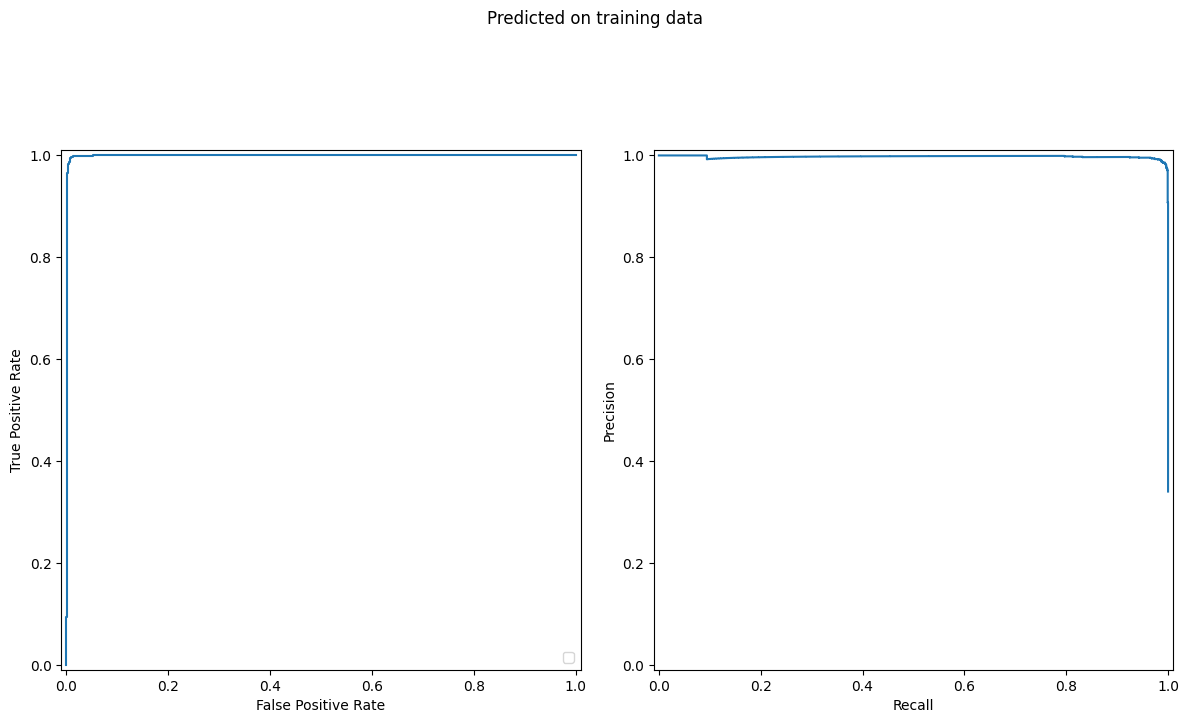

In [10]:
from matplotlib import pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_curve, precision_recall_curve, PrecisionRecallDisplay

y_true = df[df['idx'].isin(train_dataset['idx'])]['label']
y_pred = df[df['idx'].isin(train_dataset['idx'])]['pred|1']

fpr, tpr, _ = roc_curve(y_true, y_pred)
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Predicted on training data')
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
fig.tight_layout()
plt.show()

/home/rept/.venvs/main12/lib/python3.12/site-packages/sklearn/metrics/_plot/roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


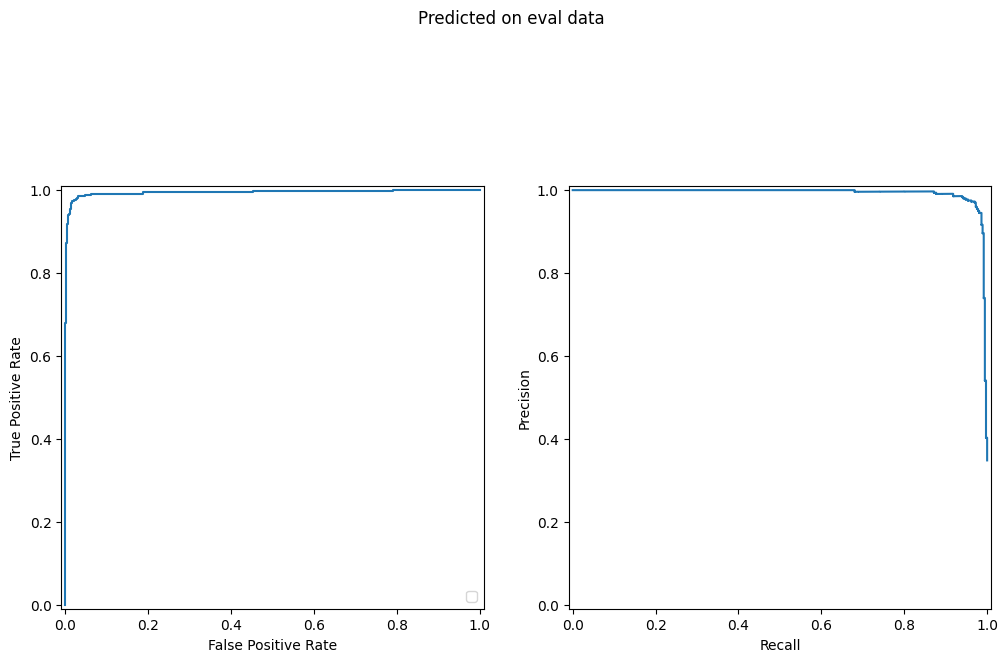

In [11]:
from matplotlib import pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_curve

y_true = df[df['idx'].isin(eval_dataset['idx'])]['label']
y_pred = df[df['idx'].isin(eval_dataset['idx'])]['pred|1']

fpr, tpr, _ = roc_curve(y_true, y_pred)
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

fig.suptitle('Predicted on eval data')
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

In [12]:
pd.DataFrame([precision, recall, thresholds])

0         1         2         3         4         5         6     \
0  0.347909  0.348240  0.348571  0.348904  0.349237  0.349570  0.349904   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.000114  0.000115  0.000115  0.000115  0.000115  0.000115  0.000116   

       7         8         9         10        11        12        13    \
0  0.350239  0.350575  0.350911  0.351248  0.351585  0.351923  0.352262   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.000116  0.000116  0.000116  0.000116  0.000116  0.000116  0.000116   

       14        15        16        17        18        19        20    \
0  0.352601  0.352941  0.353282  0.353623  0.353965  0.354308  0.354651   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.000117  0.000117  0.000117  0.000117  0.000117  0.000117  0.000117   

       21        22        23        24        25        26        27    \
0  0.354995  0.355340  0.355685  0.356031  0.356378  0.356725  0.357073   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.000117  0.000117  0.000117  0.000117  0.000117  0.000117  0.000117   

       28        29        30        31        32        33        34    \
0  0.357422  0.357771  0.358121  0.358472  0.358824  0.359176  0.359528   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.000118  0.000118  0.000118  0.000118  0.000118  0.000118  0.000118   

       35        36        37        38        39        40        41    \
0  0.359882  0.360236  0.360591  0.360947  0.361303  0.361660  0.362018   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.000118  0.000118  0.000118  0.000118  0.000118  0.000119  0.000119   

       42        43        44        45        46        47        48    \
0  0.362376  0.362735  0.363095  0.363456  0.363817  0.364179  0.364542   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.000119  0.000119  0.000119  0.000119  0.000119  0.000119  0.000119   

       49        50        51        52        53        54        55    \
0  0.364905  0.365269  0.365634  0.366000  0.366366  0.366733  0.367101   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.000119  0.000119  0.000119  0.000119  0.000119  0.000120  0.000120   

      56        57        58       59        60        61        62    \
0  0.36747  0.367839  0.368209  0.36858  0.368952  0.369324  0.369697   
1  1.00000  1.000000  1.000000  1.00000  1.000000  1.000000  1.000000   
2  0.00012  0.000120  0.000120  0.00012  0.000120  0.000120  0.000120   

       63        64        65        66        67        68        69    \
0  0.370071  0.370445  0.370821  0.371197  0.371574  0.371951  0.372330   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.000120  0.000120  0.000120  0.000120  0.000120  0.000120  0.000121   

       70        71        72        73        74        75        76    \
0  0.372709  0.373089  0.373469  0.373851  0.374233  0.374616  0.375000   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.000121  0.000121  0.000121  0.000121  0.000121  0.000121  0.000121   

       77        78        79        80        81        82        83    \
0  0.375385  0.375770  0.376156  0.376543  0.376931  0.377320  0.377709   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.000121  0.000121  0.000121  0.000121  0.000121  0.000121  0.000121   

       84        85        86        87        88        89        90    \
0  0.378099  0.378490  0.378882  0.379275  0.379668  0.380062  0.380457   
1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0.000121  0.000121  0.000121  0.000122  0.000122  0.000122  0.000122   

       91        92        93        94        95        96        97    \
0  0.380853  0.381250  0.38

In [14]:
tradeoff = 696
print('total unseen items:', len(y_pred))
print('precision', precision[tradeoff])
print('recall', recall[tradeoff])
print('threshold', thresholds[tradeoff])
print('to annotate:', (y_pred >= thresholds[tradeoff]).sum())
print('ignored:', (y_pred < thresholds[tradeoff]).sum())
print('num possibly missed:', len(y_pred) * (1 - recall[tradeoff]))
print('num docs to annotate that are probably not relevant:', (y_pred>=thresholds[tradeoff]).sum() * (1 - precision[tradeoff]))

total unseen items: 1052
precision 0.9775280898876404
recall 0.9508196721311475
threshold 0.9963193
to annotate: 356
ignored: 696
num possibly missed: 51.73770491803285
num docs to annotate that are probably not relevant: 8.00000000000002


## Load & predict new data

In [15]:
df_new = pd.read_feather('data/beccs/articles.arrow').replace({np.nan: None})
df_new['text'] = [f"{r['title']} {r['abstract']}" for _, r in df_new.iterrows()]
df_new.head()

id                                       display_name  \
0  W998313739  CIUDEN experiences in CO 2 capture by oxycombu...   
1  W996081189  Renewable and Conventional Electricity Generat...   
2  W987537630  CFD modelling of co-firing of biomass with coa...   
3  W974774861  Strategic Sustainable Development for the Stat...   
4  W966484026  Reducing Carbon Emissions From Natural Gas-fir...   

                                               title  \
0  CIUDEN experiences in CO 2 capture by oxycombu...   
1  Renewable and Conventional Electricity Generat...   
2  CFD modelling of co-firing of biomass with coa...   
3  Strategic Sustainable Development for the Stat...   
4  Reducing Carbon Emissions From Natural Gas-fir...   

                                            abstract  \
0  One   of   the   most   relevant   European   ...   
1  In this chapter, the primary technical aspects...   
2  Co-firing biomass is the principal means of mi...   
3  An examination of the stationary power sector ...   
4  In this thesis, possibilities to reduce emissi...   

                                      title_abstract  \
0  CIUDEN experiences in CO 2 capture by oxycombu...   
1  Renewable and Conventional Electricity Generat...   
2  CFD modelling of co-firing of biomass with coa...   
3  Strategic Sustainable Development for the Stat...   
4  Reducing Carbon Emissions From Natural Gas-fir...   

                                         authorships  \
0  [{'author': {'display_name': 'Pedro Otero', 'i...   
1  [{'author': {'display_name': 'George Kosmadaki...   
2  [{'author': {'display_name': 'Arafat A. Bhuiya...   
3  [{'author': {'display_name': 'Lisa Chacón', 'i...   
4  [{'author': {'display_name': 'Erik Pihl', 'id'...   

                                           locations  is_retracted  \
0  [{'is_oa': False, 'is_primary': True, 'landing...         False   
1  [{'is_oa': False, 'is_primary': True, 'landing...         False   
2  [{'is_oa': False, 'is_primary': True, 'landing...         False   
3  [{'is_oa': False, 'is_primary': False, 'landin...         False   
4  [{'is_oa': False, 'is_primary': False, 'landin...         False   

  is_accepted  cited_by_count  is_paratext is_published language  \
0       False               0        False        False       en   
1       False              19        False        False       en   
2       False             133        False        False       en   
3       False               1        False        False       en   
4       False               0        False        False       en   

           type        mag  publication_year            _version_  \
0       article  998313739              2015  1792687275954405377   
1  book-chapter  996081189              2013  1792723741699997697   
2       article  987537630              2015  1792884794752761856   
3       article  974774861              2006  1792975134307385351   
4  dissertation  966484026              2012  1792929597459791875   

       publication_date          created_date              updated_date  \
0  2015-01-01T00:00:00Z  2016-06-24T00:00:00Z  2024-01-31T10:44:25.629Z   
1  2013-01-01T00:00:00Z  2016-06-24T00:00:00Z  2024-02-18T09:39:00.483Z   
2  2015-11-01T00:00:00Z  2016-06-24T00:00:00Z  2024-02-25T20:05:39.768Z   
3  2006-01-01T00:00:00Z  2016-06-24T00:00:00Z  2024-02-27T07:26:43.020Z   
4  2012-01-01T00:00:00Z  2016-06-24T00:00:00Z  2024-02-25T09:04:53.430Z   

   indexed_in                                          doi  \
0        None                                         None   
1  [crossref]  https://doi.org/10.1007/978-1-4471-5595-9_2   
2  [crossref]   https://doi.org/10.1016/j.fuel.2015.06.058   
3        None                                         None   
4        None                                         None   

                                              biblio  pmid pmcid  \
0                                               None  None  None   
1                                               N

In [16]:
preds = []
with torch.no_grad():
    ds_new = Dataset.from_pandas(df_new)
    ds_new = ds_new.map(lambda x: tokenizer(x['text'], padding='max_length', truncation=True), batched=True)
    ds_new.set_format("torch")

    for batch in ds_new.iter(batch_size=100):
        pred = model(input_ids=batch['input_ids'].to('cuda'), attention_mask=batch['attention_mask'].to('cuda') )
        preds.append(torch.softmax(pred.logits, dim=1))

df_new['pred|0'] = torch.concatenate(preds).cpu()[:,0]
df_new['pred|1'] = torch.concatenate(preds).cpu()[:,1]
df_new['pred'] = torch.concatenate(preds).cpu().argmax(dim=1)

print(df.shape)
print(df_new.shape)
print(f'predicted exclude: {(df_new['pred|0']>0.5).sum()} | predicted include: {(df_new['pred|1']>=0.5).sum()}')

df_new.head()

Map:   0%|          | 0/2509 [00:00<?, ? examples/s]

(50350, 49)
(2509, 29)
predicted exclude: 503 | predicted include: 2006


id                                       display_name  \
0  W998313739  CIUDEN experiences in CO 2 capture by oxycombu...   
1  W996081189  Renewable and Conventional Electricity Generat...   
2  W987537630  CFD modelling of co-firing of biomass with coa...   
3  W974774861  Strategic Sustainable Development for the Stat...   
4  W966484026  Reducing Carbon Emissions From Natural Gas-fir...   

                                               title  \
0  CIUDEN experiences in CO 2 capture by oxycombu...   
1  Renewable and Conventional Electricity Generat...   
2  CFD modelling of co-firing of biomass with coa...   
3  Strategic Sustainable Development for the Stat...   
4  Reducing Carbon Emissions From Natural Gas-fir...   

                                            abstract  \
0  One   of   the   most   relevant   European   ...   
1  In this chapter, the primary technical aspects...   
2  Co-firing biomass is the principal means of mi...   
3  An examination of the stationary power sector ...   
4  In this thesis, possibilities to reduce emissi...   

                                      title_abstract  \
0  CIUDEN experiences in CO 2 capture by oxycombu...   
1  Renewable and Conventional Electricity Generat...   
2  CFD modelling of co-firing of biomass with coa...   
3  Strategic Sustainable Development for the Stat...   
4  Reducing Carbon Emissions From Natural Gas-fir...   

                                         authorships  \
0  [{'author': {'display_name': 'Pedro Otero', 'i...   
1  [{'author': {'display_name': 'George Kosmadaki...   
2  [{'author': {'display_name': 'Arafat A. Bhuiya...   
3  [{'author': {'display_name': 'Lisa Chacón', 'i...   
4  [{'author': {'display_name': 'Erik Pihl', 'id'...   

                                           locations  is_retracted  \
0  [{'is_oa': False, 'is_primary': True, 'landing...         False   
1  [{'is_oa': False, 'is_primary': True, 'landing...         False   
2  [{'is_oa': False, 'is_primary': True, 'landing...         False   
3  [{'is_oa': False, 'is_primary': False, 'landin...         False   
4  [{'is_oa': False, 'is_primary': False, 'landin...         False   

  is_accepted  cited_by_count  is_paratext is_published language  \
0       False               0        False        False       en   
1       False              19        False        False       en   
2       False             133        False        False       en   
3       False               1        False        False       en   
4       False               0        False        False       en   

           type        mag  publication_year            _version_  \
0       article  998313739              2015  1792687275954405377   
1  book-chapter  996081189              2013  1792723741699997697   
2       article  987537630              2015  1792884794752761856   
3       article  974774861              2006  1792975134307385351   
4  dissertation  966484026              2012  1792929597459791875   

       publication_date          created_date              updated_date  \
0  2015-01-01T00:00:00Z  2016-06-24T00:00:00Z  2024-01-31T10:44:25.629Z   
1  2013-01-01T00:00:00Z  2016-06-24T00:00:00Z  2024-02-18T09:39:00.483Z   
2  2015-11-01T00:00:00Z  2016-06-24T00:00:00Z  2024-02-25T20:05:39.768Z   
3  2006-01-01T00:00:00Z  2016-06-24T00:00:00Z  2024-02-27T07:26:43.020Z   
4  2012-01-01T00:00:00Z  2016-06-24T00:00:00Z  2024-02-25T09:04:53.430Z   

   indexed_in                                          doi  \
0        None                                         None   
1  [crossref]  https://doi.org/10.1007/978-1-4471-5595-9_2   
2  [crossref]   https://doi.org/10.1016/j.fuel.2015.06.058   
3        None                                         None   
4        None                                         None   

                                              biblio  pmid pmcid  \
0                                               None  None  None   
1                                               N

### Overlaps

In [17]:
orig = set(df[df[key]>=0.5]['openalex_id'])
new = set(df_new['id'])

print(len(orig), len(new))

print('new', len(new - orig))
print('missing', len(orig - new))
print('overlap', len(orig & new))
print('union', len(orig | new))
print('xor', len(orig ^ new))  #  in a or b but not both

1797 2509
new 1269
missing 557
overlap 1240
union 3066
xor 1826


## Predict method

In [22]:
# in case we have one trained already, use that model
tokenizer = AutoTokenizer.from_pretrained(model_name, max_length=512)
model = AutoModelForSequenceClassification.from_pretrained('data/models/method', num_labels=len(labels))

In [24]:
preds = []
model.to('cuda')
with torch.no_grad():
    ds_new = Dataset.from_pandas(df_new)
    ds_new = ds_new.map(lambda x: tokenizer(x['text'], padding='max_length', truncation=True), batched=True)
    ds_new.set_format("torch")

    for batch in ds_new.iter(batch_size=100):
        pred = model(input_ids=batch['input_ids'].to('cuda'), attention_mask=batch['attention_mask'].to('cuda') )
        preds.append(torch.softmax(pred.logits, dim=1))

Map:   0%|          | 0/2509 [00:00<?, ? examples/s]

In [25]:
for i in range(len(labels)):
    df_new[f'meth|{i}'] = torch.concatenate(preds).cpu()[:,i]
    df_new['meth'] = torch.concatenate(preds).cpu().argmax(dim=1)
for i, v in df_new['meth'].value_counts().items():
    print(i, labels[i], ':', v)

2 Modelling : 942
5 Review : 678
1 Experimental - laboratory : 284
3 Data analysis / statistical analysis / econometrics : 223
0 Experimental - fieldstudy : 193
4 Life cycle assessment : 90
8 Qualitative research : 86
9 Unknown method : 7
6 Systematic review : 5
7 Survey : 1


## Estimations

In [26]:
print(f'predicted exclude: {(df_new['pred|0']>0.5).sum()}')
print(f'predicted include: {(df_new['pred|1']>=0.5).sum()}')
print(f'predicted include and review: {((df_new['pred|1']>=0.5) & (df_new['meth|5']>0.5)).sum()}')
print(f'predicted include and review: {((df_new['pred|1']>=0.5) & (df_new['meth|5']>0.5)).sum()}')

predicted exclude: 503
predicted include: 2006
predicted include and review: 475
predicted include and review: 475


### Reviews by classifier

In [27]:
for i, row in df_new[df_new['meth|5']>0.5].sort_values(by='publication_year').iterrows():
    print(i, row['pred'], row['doi'], row['publication_year'], row['title'])

2247 0 https://doi.org/10.1016/0021-9517(68)90254-6 1968 Kinetics of the reaction of methane with CO2 over nickel
1975 1 https://doi.org/10.1016/s0010-2180(74)80035-0 1974 Hazards from combustible materials
2157 0 https://doi.org/10.1016/0304-3746(82)90005-1 1982 Some perspectives of the major biogeochemical cycles, scope 17
2378 0 https://doi.org/10.1016/0269-7491(89)90166-8 1989 The Greenhouse effect: Impacts of ultraviolet-B (UV-B) radiation, carbon dioxide (CO2), and ozone (O3) on vegetation
1506 1 https://doi.org/10.1016/0022-0981(93)90148-h 1993 Advances in marine biology, volume 28
596 1 https://doi.org/10.1016/s0140-6701(97)83035-4 1997 97/01252 Development of a new generation of small scale biomass-fueled electric generating power plants
2346 0 https://doi.org/10.1016/s1011-1344(98)00186-9 1998 Effects of enhanced solar ultraviolet radiation on biogeochemical cycles
582 1 https://doi.org/10.1016/s0026-0576(97)83059-0 1998 Tanks
626 1 https://doi.org/10.1016/s1365-6937(99)90534

### Reviews by title

In [28]:
def oring(arr):
    ret = arr[0]
    for a in arr[1:]:
        ret |= a
    return ret

masks = {
    term: df_new['title'].str.lower().str.contains(term)
    for term in ['systematic review', 'map', 'systematic map', 'meta analysis', 'meta-analysis', 'evidence synthesis']
}

for k, v in masks.items():
    print(k, v.sum())

print()

mask_or = oring(list(masks.values()))
print('ORed', mask_or.sum())

mask_incl = df_new['pred|1']>=0.5
print('ORed & incl', (mask_or & mask_incl).sum())

systematic review 3
map 15
systematic map 0
meta analysis 0
meta-analysis 10
evidence synthesis 0

ORed 28
ORed & incl 23


In [29]:
for i, row in df_new[mask_or].sort_values(by='publication_year').iterrows():
    print(i, row['pred'], row['doi'], row['publication_year'], row['title'])

1583 1 https://doi.org/10.1016/j.rser.2018.08.008 2018 Low-carbon roadmap of chemical production: A case study of ethylene in China
1435 1 None 2018 Mapping the cost of CCUS Technologies: from partial capture to negative emissions
1374 1 https://doi.org/10.1016/j.futures.2019.102472 2019 Map-makers and navigators of politicised terrain: Expert understandings of epistemological uncertainty in integrated assessment modelling of bioenergy with carbon capture and storage
617 1 https://doi.org/10.5194/essd-2019-118 2019 Mapping the yields of lignocellulosic bioenergy crops from observations at the global scale
1417 1 https://doi.org/10.5194/essd-12-789-2020 2020 Mapping the yields of lignocellulosic bioenergy crops from observations at the global scale
1271 1 https://doi.org/10.1016/j.gloenvcha.2020.102073 2020 Mapping feasibilities of greenhouse gas removal: Key issues, gaps and opening up assessments
1132 1 https://doi.org/10.3389/fclim.2020.604787 2020 Mapping Multi-Level Policy Incentiv

### PDF and parsed

In [30]:
from pathlib import Path

pdfs = [f.stem for f in Path('data/beccs/pdfs').glob('*.pdf')]
teis = [f.stem.split('.')[0] for f in Path('data/beccs/teis').glob('*.xml')]
print(len(pdfs), df_new['id'].isin(pdfs).sum())
print(len(teis), df_new['id'].isin(teis).sum())

m_incl = df_new['pred|1'] > 0.5
m_rev = df_new['meth|5'] > 0.5

print('total', len(df_new))
print('incl', m_incl.sum(), (m_incl & df_new['id'].isin(pdfs)).sum(), (m_incl & df_new['id'].isin(teis)).sum())
print('reviews', m_rev.sum(), (m_rev & df_new['id'].isin(pdfs)).sum(), (m_rev & df_new['id'].isin(teis)).sum())
print('reviews & incl', (m_rev & m_incl).sum(), (m_rev & m_incl & df_new['id'].isin(pdfs)).sum(), (m_rev & m_incl & df_new['id'].isin(teis)).sum())

832 832
775 775
total 2509
incl 2006 662 611
reviews 588 150 140
reviews & incl 475 122 113


### Save predictions

In [31]:
df_new.to_feather('data/beccs/predictions.arrow')

In [32]:
df.to_feather('data/beccs/predictions_orig.arrow')